
## Решающие деревья

### Введение

- Это связный ациклический граф. В нём можно выделить 3 типа вершин
- `Корневая вершина` (root node) — откуда всё начинается.
- `Внутренние вершины` (intermediate nodes).
- `Листья` (leaves) — самые глубокие вершины дерева, в которых содержится "ответ".


Во внутренней или корневой вершине признак проверяется на некий логический критерий, по результатам которого мы движемся всё глубже по дереву.

### В чем отличие от линейных моделей

- `Линейные` модели быстро учатся (матричные или градиентный спуск)
- `Линейные` модели могу востанавливать только простые зависимости (из-за ограниченного количество параметров)
- `Линейные` модели можно использовать для восстановлния нелинейных зависимостей за счет перехода к спрямляющему пространству 
- `Линейные` модели не отображают особенности процесса принятия решения у людей (человек будет задавать ряд вопросов)

### Как строится деревье решений

Пример построения деревьев:

```python
function decision_tree(X, y):
    if stopping_criterion(X, y) == True:
        S = create_leaf_with_prediction(y)
    else:
        S = create_node()
        (X_1, y_1) .. (X_L, y_L) = best_split(X, y)
        for i in 1..L:
            C = decision_tree(X_i, y_i)
            connect_nodes(S, C)
    return S
```

У нас есть исходная выборка `X0` и ответы `y0`

- При каждом новом вызове функции, проверяем `критерии остановки` (stopping_criterion) для текущей **подвыпорки** (Xx,yx)
    - Если критерии выполняются, функция возвращает новый `лист` дерева с предсказанием (create_leaf_with_prediction), на основе правильных ответов y, все объекты попав в этот лист будут иметь это предсказание

    - В ином случае, стоится внутренная вершина в которой будет определено правило разделения (объекты попадут в одну из ветвей). Наилучшее разбиение (best_split) может определятся с помощью мер неопределенности (impurity measures)

- Подвыборки (Xx,yx), (Xk,yk) подаются на вход следующиим вызован этой рекурсивной функции

### Борьба с переобучением (регуляризация)

Приведём несколько возможных способов сделать алгоритм более обобщающим, т.е. менее заточенным под конкретную выборку:

- Задать порог по мере неопределённости
- Задать порог по размеру узла
- Задать порог на глубину
- Задать порог на размер потомков 

## Задание

### <b>Задание <span style='color:#686dec'>5.2.2</span></b> 

По графику выше определите, какова `максимальная глубина` этого решающего дерева? (Это сбалансированное дерево, т.е. все его ветви одинаковой глубины)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

RANDOM_SEED = 139

train_data, train_labels = make_blobs(n_samples=200, 
                                      centers=[(0,1),(-3,-3),(4,2)], 
                                      n_features=2, 
                                      random_state=RANDOM_SEED,
                                      cluster_std=(1.2,1.5,1,))

# для визуализации
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), 
                       np.arange(y_min, y_max, 0.01))

train_data.shape, train_labels.shape

((200, 2), (200,))

In [6]:
# модель 
clf_tree = DecisionTreeClassifier(criterion='entropy', 
                                  max_depth=3, 
                                  random_state=RANDOM_SEED)

In [9]:
# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)

# np.c_ - add along 2nd axis (columns)
# np.r_ - add along 1st axis (rows)

grid_data = np.c_[xx.flatten(),yy.flatten()]
print(grid_data.shape)

# предсказываем 
predicted = clf_tree.predict(grid_data).reshape(xx.shape)
print(predicted.shape)

(2156197, 2)
(1427, 1511)


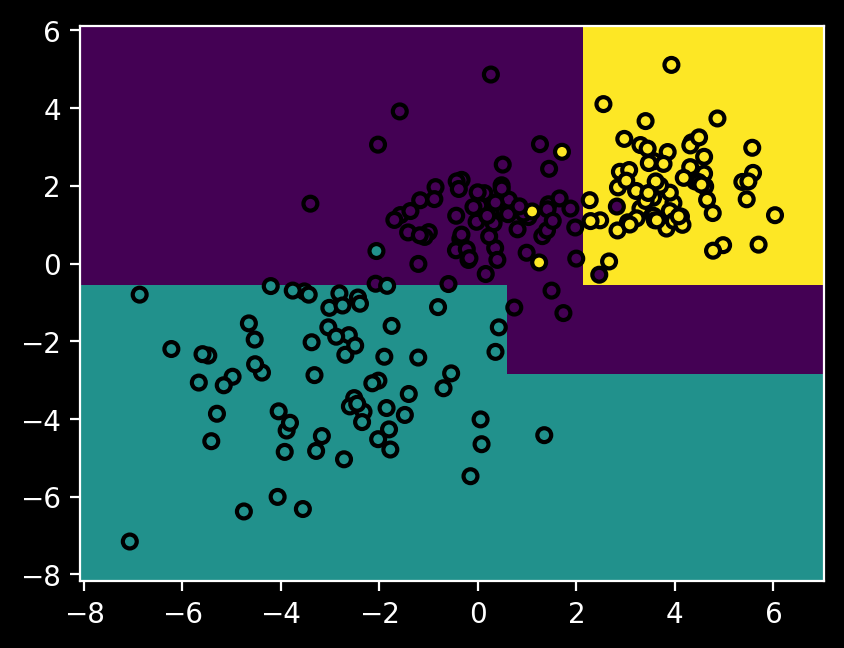

In [12]:
plt.pcolormesh(xx, yy, predicted, cmap='viridis')
plt.scatter(train_data[:, 0], train_data[:, 1], 
            c=train_labels, s=25, 
            cmap='viridis', 
            edgecolors='black', linewidth=1.5);

плоскость делят **4 прямые**, следовательно есть 4 разделения выборки надвое, для такого количества разделений дерево должно быть как минимум глубины 3

### Переобучение

- Решающее дерево вполне может **переобучиться**: его можно сделать настолько глубоким, что каждый лист решающего дерева будет соответствовать ровно одному объекту обучающей выборки `max_depth=None`
- В этом случае, если записать в каждом листе ответ соответствующего объекта, на **обучающей выборке получается нулевая ошибка** 
- Дерево получается явно переобученным

model depth: 10

confusion matrix:
[[167   0   0]
 [  0 167   0]
 [  0   0 166]]


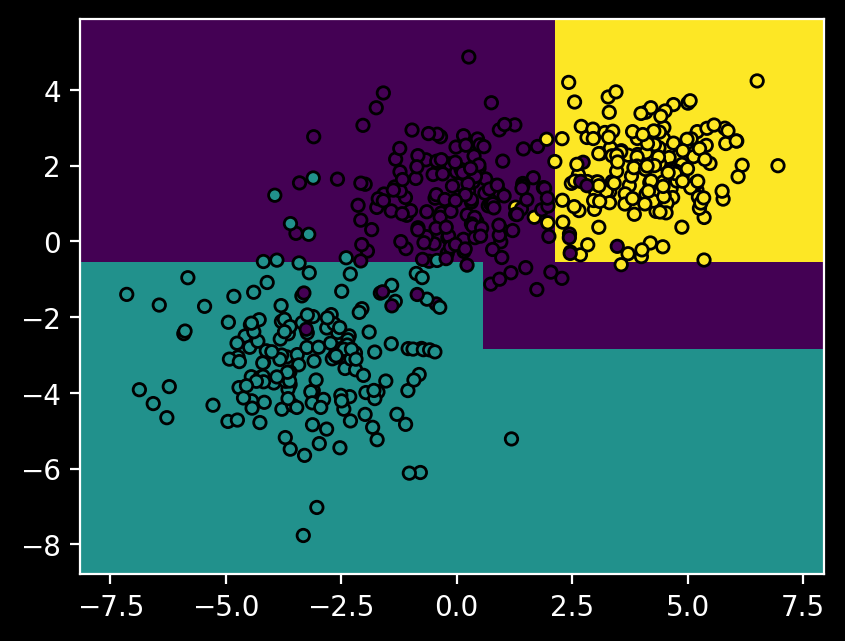

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix as cm
%matplotlib inline

RANDOM_SEED = 139

# Make training data
train_data, train_labels = make_blobs(n_samples=500, 
                                      centers=[(0,1),(-3,-3),(4,2)], 
                                      n_features=2, 
                                      random_state=RANDOM_SEED,
                                      cluster_std=(1.2,1.5,1,))

# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), 
                       np.arange(y_min, y_max, 0.01))

# Decision Tree Model
model = DecisionTreeClassifier(criterion='entropy', 
                                  max_depth=None, 
                                  random_state=RANDOM_SEED)

# training the tree
model.fit(train_data, train_labels)
y_pred = model.predict(train_data)
print(f'model depth: {model.tree_.max_depth}')

# some codee to depict separating surface
xx, yy = get_grid(train_data)

# predict on grid
predicted = clf_tree.predict(np.c_[xx.flatten(), 
                                   yy.flatten()])
predicted_grid = predicted.reshape(xx.shape)

# max depth results in zero error on training set
print('\nconfusion matrix:')
print(cm(y_pred,train_labels))

# plot prediction on grid
plt.pcolormesh(xx, yy, predicted_grid)

# plot true results
plt.scatter(train_data[:, 0],
            train_data[:, 1], 
            c=train_labels, 
            s=20, 
            edgecolors='black', 
            linewidth=1)


   
### Решаюшие деревья для Регресии

Мы можем использовать депевье решении для задачи регресии

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set(style='whitegrid')

RANDOM_SEED = 139

n_train = 150        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 5) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 5) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)
print(X_train.shape,X_test.shape)

(150, 1) (1000, 1)


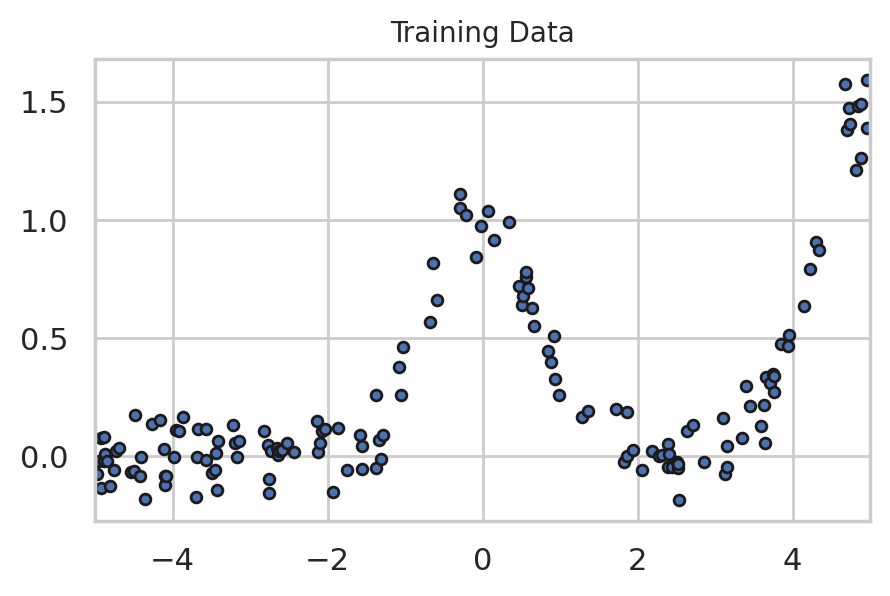

In [17]:

plt.rcParams['figure.figsize'] = 5, 3
plt.figure()
plt.scatter(X_train, y_train, c="b", s=15,edgecolors='k')
plt.xlim([-5, 5])
plt.title("Training Data",size=10)
plt.show()

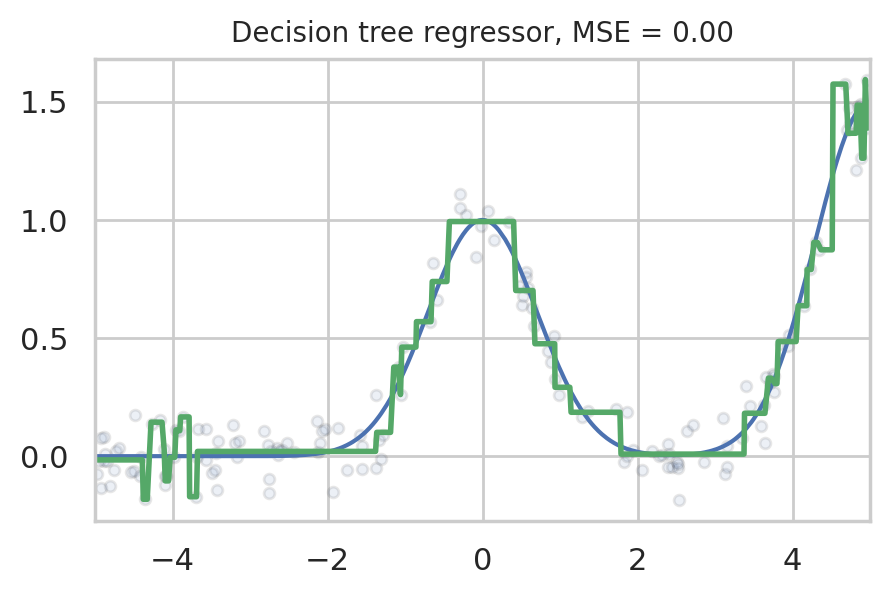

In [18]:
from sklearn.tree import DecisionTreeRegressor as DTR

model = DTR(max_depth=6,
            random_state=RANDOM_SEED)
model.fit(X_train, y_train)
ym_train = model.predict(X_train)
ym_test = model.predict(X_test)

plt.figure()
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=15,edgecolors='k',alpha=0.1)
plt.plot(X_test, ym_test, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.mean((y_train - ym_train) ** 2),size=10)
plt.show()

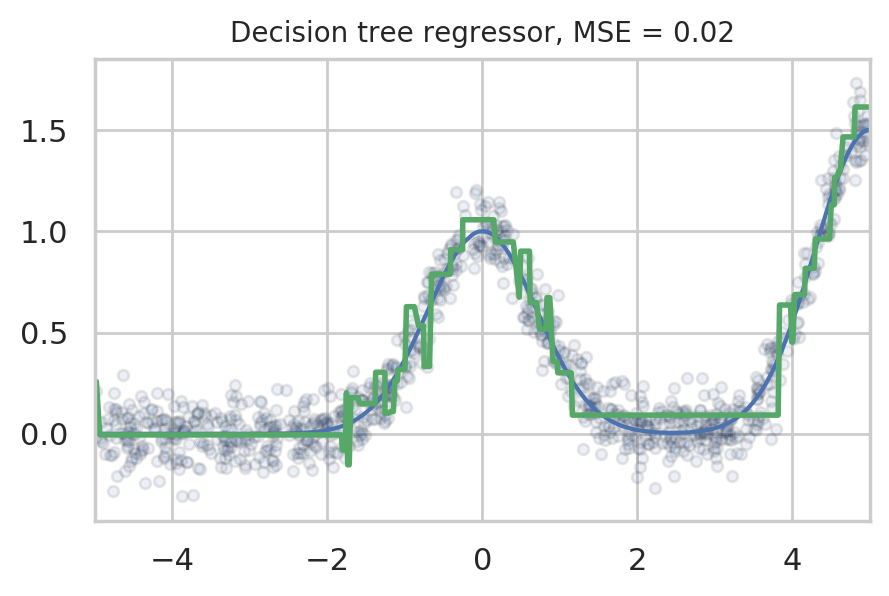

In [8]:
# на тестовой выборке
plt.figure()
plt.plot(X_test, f(X_test), "b")
plt.plot(X_test, ym_test, "g", lw=2)
plt.scatter(X_test, y_test, c="b", s=15,edgecolors='k',alpha=0.1)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.mean((y_test - ym_test) ** 2),size=10)
plt.show()

## Построение дерева

В случае CART-деревьев

- Дерево строится жадным способом; на каждом этапе построения очередных двух потомков находится наилучшее с точки зрения критерия разделение выборки. 
- В алгоритме, который мы описали ранее, имели место вызовы функции best_split(X,y), сейчас мы разберём, что есть лучшее разбиение.

Формально это записывается следующим образом:

- Пусть в вершину m попало множество $X_{m}$ объектов из обучающей выборки. 
- Параметры в условии $\left[ x^{j}\leq t\right]$ будут выбраны так, чтобы минимизировать данный критерий ошибки , зависящий от этих параметров: $Q\left( x_{m},j,t\right) =\min _{j,t}$
- где j — номер признака, t — пороговое значение признака. Параметры j и t можно подбирать перебором. 
- Действительно, признаков конечное число, а из всехвозможных значений порога  можно рассматривать только те, при которых получаются различные разбиения. Можно показать, что таких значений параметра  столько, сколько различных значений признака  на обучающей выборке.


После того, как параметры были выбраны, множество $X_{m}$ объектов из обучающей выборки разбивается на два множества 

- $X_{l}=\left\{ x\in X_{m} | x^{j}\leq t\right\}$
- $X_{r}=\left\{ x\in X_{m} | x^{j}\gt t\right\}$

каждое из которых соответствует своей дочерней вершине.

- Предложенную процедуру можно продолжить для каждой из дочерних вершин: в этом случае дерево будет все больше и больше углубляться.
- Такой процесс рано или поздно должен остановиться, и очередная дочерняя вершина будет объявлена листком, а не разделена пополам.
- Этот момент определяется критерием остановки. Одним из тех, которые мы описали в пункте о борьбе с переобучением.


После построения листового узла требуется задать прогноз, который будет присвоен всем объектам, которые на этапе тестирования попадут в этот лист. В случае классификации оптимально возвращать тот класс, который наиболее популярен среди объектов в $X_{m}$



### Критерии информативности

Начнем с функционала качества
- Нам необходимо оптимизировать `критерий ошибки` $Q\left( X_{m},j,t\right) -> \min _{j,t}$

Критерий ошибки состоит из двух слагаемых, каждый из которых соответствует дочерним узлам:

$Q\left( X_{m},j,t\right) = \dfrac {\left| X_{l}\right| }{\left| X_{m}\right| }S\left( X_{l}\right) + \dfrac {\left| X_{r}\right| }{\left| X_{m}\right| }S\left( X_{r}\right)$ 

 $X_{m}$ общая выборка, попавшая в вершину, $\left| X_{m}\right|$ — размер этой выборки;
 
- j номер признака, используемого для разбиения;
- t пороговое значение для признака;
 
$X_{l}$ и $X_{r}$ — выборки, попавшие в левую и правую вершины при разбиении выборки $X_{m}$ с параметрами j и t, $\left| X_{l}\right|$ и $\left| X_{r}\right|$ — размеры этих выборок;


 $S(X)$ это некоторая функция, которая называется `критерием информативности`, её значение уменьшается с уменьшением разброса ответов на выборке $X$ (об этом мы подробнее поговорим ниже).

Также стоит ввести такое понятие, как **`прирост информации`** (information gain):

$IG\left( X_{m},j,t\right) = Q\left( X_{m},j,t\right) - \dfrac {\left| X_{l}\right| }{\left| X_{m}\right| }S\left( X_{l}\right) - \dfrac {\left| X_{r}\right| }{\left| X_{m}\right| }S\left( X_{r}\right)$ 

Это соотношение показывает, насколько изменилась информативность при данном разбиении, т.е. по значению t признака j.

**Энтропийный критерии информативности**

$S(X) = -\sum ^{k}_{k=1}p_{k}\log _{2}p_{k}$

Энтропия соответствует степени хаоса в системе. Чем выше энтропия, тем менее упорядочена система и наоборот.

где $p_{k}$ — вероятности нахождения системы в k-ом состоянии.
 В нашем случае  K — это количество классов, $p_{k}$ — вероятность отношения объекта X из  к -тому классу.

eg. Первое состояние $S_{0}$ : 9 синих шариков и 11 жёлтых. Если мы наудачу вытащим шарик, то он с вероятностью 9/20 будет синим и с вероятностью 11/20 — жёлтым.

Кроме `критерия информативности`, необходимо рассмотреть, какие мы можем вводить ограничения на дерево:

- Ограничение максимальной глубины дерева
- Ограничение максимального количества листьев в дереве
- Ограничение минимального числа объектов в одном листе